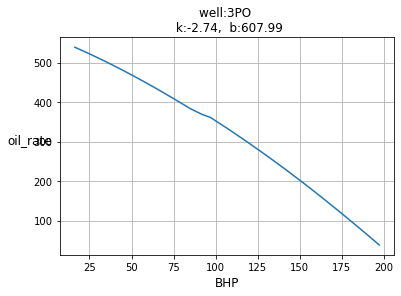

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as lin_reg

# загружаем данные
df = pd.read_csv ('/Users/marchhelena/Desktop/Python/IPR_point.txt', sep='\t')

# меняем названия колонок
col_names=['well', 'dates', 'BHP', 'oil_rate', 'water_rate','gas_rate', 'mas_oil_rate','mas_gas_rate','PI_oil', 'PI_water','PI_gas']
df.columns = col_names

#преобразуем тип данных
df.iloc[:, 2:10] = df.iloc[:, 2:10].astype(float)

# удаляем выбросы
df = df[df['oil_rate']>=0.9]

# итерируемся по уникальным названиям скважин
wells = df['well'].unique()
for well in wells[1:]:      # менять тут
    
    df_temp = df[df['well']==well]
    
    X = df_temp['BHP'].values.reshape(-1,1)
    y = df_temp['oil_rate'].values.reshape(-1,1)
    model = lin_reg()
    model.fit(X, y)

    k = model.coef_[0][0]
    b = model.intercept_[0]
    
    fig = plt.figure()
    plt.plot(X, y, label='data')
    plt.title(f'well:{well} \n k:{k:.2f},  b:{b:.2f}')
    
    plt.xlabel('BHP', size=12)
    plt.ylabel('oil_rate', rotation=0, size=12)
    plt.grid()
    plt.show(fig)
    break